<h1><b><font color = black><a id='division_ID0'>2001 - 2010 INDIA AUTOTHEFT STATISTICS</a></font></b></h1><br>
<b>Built by Arijit Roy, Arkadeep Roy, Soumodip Ghosh, Ankita Datta, Shayani Das</b>
<br><b>Guidance - Indranil Das, Technical Analyst, Webskitters Academy</b>
<br><b>In Association with Webskitters Academy</b>
<br><b>Hooghly Engineering & Technology College</b>

<p><b>Download Dataset Dependency - <a href = "https://drive.google.com/drive/folders/1JNcmOZ5Hwbhvh2rHtsbcWn9WKtFururI?usp=sharing">Click here</a></b></p>

<h3><b>Contents</b></h3>

[Data Collection](#division_ID1) | [Data Preprocessing](#division_ID2) | [Data Visualization](#division_ID3)

<h2><a id='division_ID1'>Data Collection</a></h2>

[MENU](#division_ID0)

In [10]:
# import dataset from local repository
import pandas as pd
df = pd.read_csv(r"E:\project-gtp-main\Dataset\auto_theft.csv")
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946
...,...,...,...,...,...,...,...
1860,Tamil Nadu,2010,AT6-Total,6. Total (Sum of 1-5 Above),2563.0,3541.0,5205
1861,Tripura,2010,AT6-Total,6. Total (Sum of 1-5 Above),NaN,26.0,50
1862,Uttar Pradesh,2010,AT6-Total,6. Total (Sum of 1-5 Above),505.0,2434.0,16705
1863,Uttarakhand,2010,AT6-Total,6. Total (Sum of 1-5 Above),NaN,244.0,853


<h2><a id='division_ID2'>Data Preprocessing</a></h2>

[MENU](#division_ID0)

In [11]:
# check for null values in the dataframe
df.isnull().sum()

Area_Name                          0
Year                               0
Group_Name                         0
Sub_Group_Name                     0
Auto_Theft_Coordinated/Traced    346
Auto_Theft_Recovered              28
Auto_Theft_Stolen                  0
dtype: int64

In [12]:
# fill the null values with 0
df.fillna(0, inplace = True)
print(df)

                      Area_Name  Year                  Group_Name  \
0     Andaman & Nicobar Islands  2001  AT1-Motor Cycles/ Scooters   
1                Andhra Pradesh  2001  AT1-Motor Cycles/ Scooters   
2             Arunachal Pradesh  2001  AT1-Motor Cycles/ Scooters   
3                         Assam  2001  AT1-Motor Cycles/ Scooters   
4                         Bihar  2001  AT1-Motor Cycles/ Scooters   
...                         ...   ...                         ...   
1860                 Tamil Nadu  2010                   AT6-Total   
1861                    Tripura  2010                   AT6-Total   
1862              Uttar Pradesh  2010                   AT6-Total   
1863                Uttarakhand  2010                   AT6-Total   
1864                West Bengal  2010                   AT6-Total   

                   Sub_Group_Name  Auto_Theft_Coordinated/Traced  \
0       1. Motor Cycles/ Scooters                            0.0   
1       1. Motor Cycles/ Scooters  

In [13]:
# drop unneccesary columns
df.drop(['Group_Name', 'Sub_Group_Name'], axis = 1, inplace = True)

In [14]:
# change the datatypes of columns as int 
for i in range(1, len(list(df.columns))):
    df.iloc[:, i] = df.iloc[:, i].astype(int)
autotheft = df.copy()

<h2><a id='division_ID3'>Data Visualization</a></h2>

[MENU](#division_ID0)

- <h3><b>2001 - 2010 Autotheft Stolen Statewise comparison</b></h3>

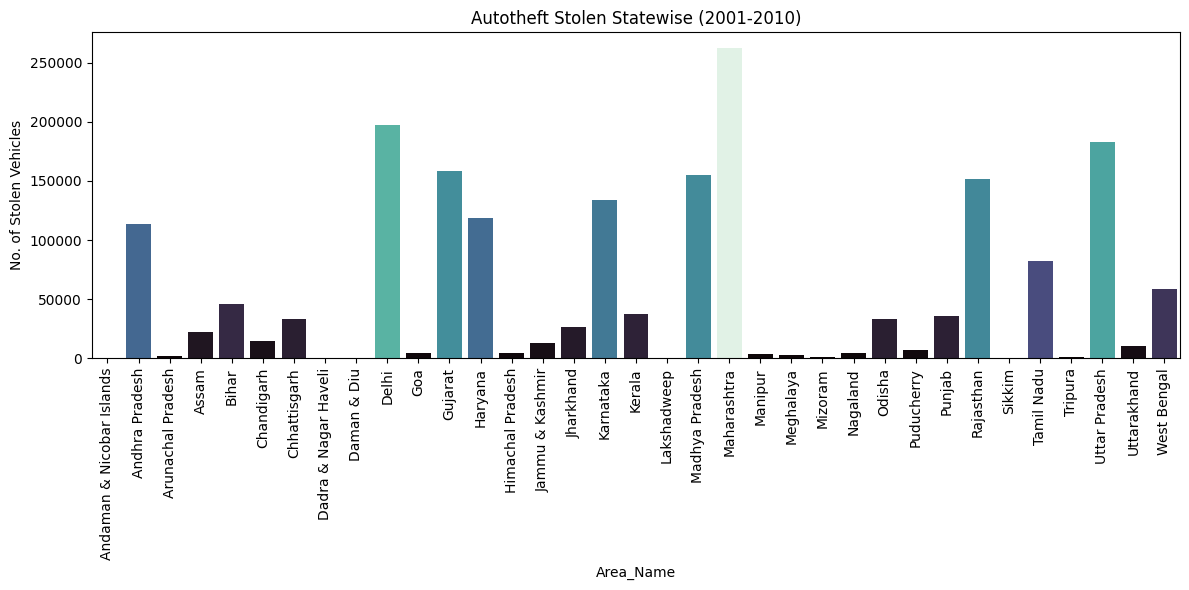

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate stolen data by state
stolen_data = df.groupby(df.columns[0])[df.columns[-1]].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=stolen_data, x=stolen_data.columns[0], y=stolen_data.columns[1], hue=stolen_data.columns[1], palette="mako", legend=False)
plt.xticks(rotation=90)
plt.title("Autotheft Stolen Statewise (2001-2010)")
plt.ylabel("No. of Stolen Vehicles")
plt.tight_layout()
plt.show()

- <h3><b>2001 - 2010 Autotheft Stolen and Recovered Yearwise Statewise</b></h3>

   Year                  Area_Name  Auto_Theft_Stolen  Auto_Theft_Recovered
0  2001  Andaman & Nicobar Islands                  8                   8.0
1  2001             Andhra Pradesh               6230                2960.0
2  2001          Arunachal Pradesh                 72                  54.0
3  2001                      Assam                876                 298.0
4  2001                      Bihar               2272                 500.0


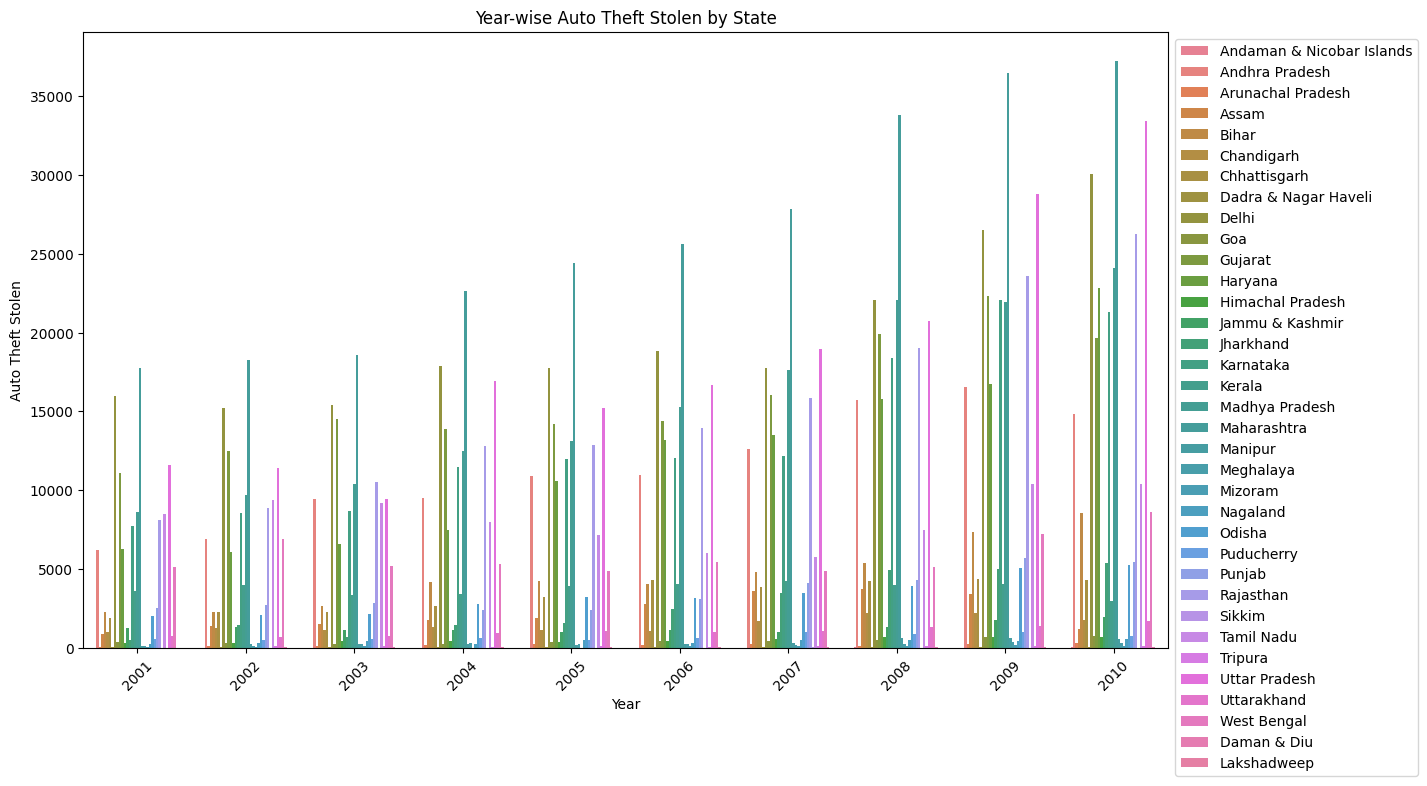

In [19]:
# Group data by Year and Area_Name (State)
summary = df.groupby(['Year', 'Area_Name'])[['Auto_Theft_Stolen', 'Auto_Theft_Recovered']].sum().reset_index()

# Display summary
print(summary.head())

# Plot bar chart for stolen vehicles
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='Auto_Theft_Stolen', hue='Area_Name', data=summary, dodge=True)
plt.xlabel("Year")
plt.ylabel("Auto Theft Stolen")
plt.title("Year-wise Auto Theft Stolen by State")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.show()

- <h3><b>Statewise Instensity of Autotheft Stolen 2001 - 2010</b></h3>

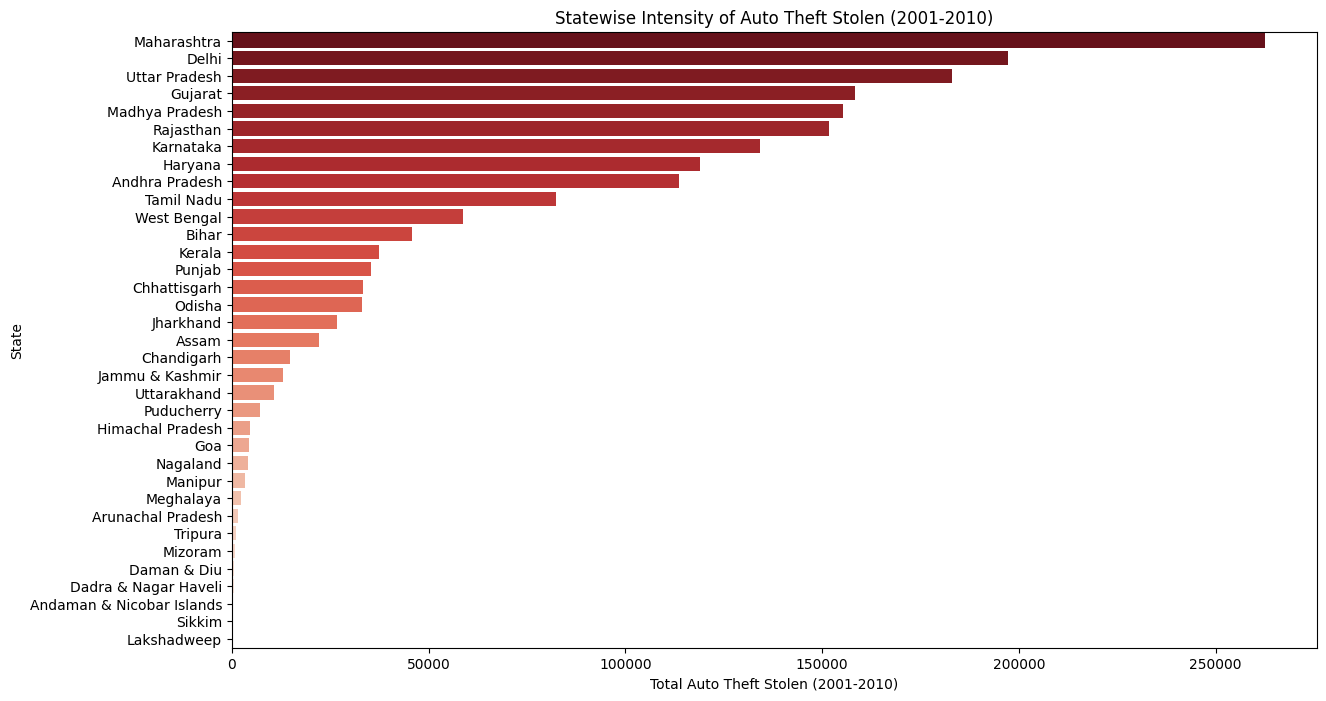

In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Group data by Area_Name (State) for total stolen vehicles from 2001-2010
statewise_intensity = df.groupby('Area_Name')['Auto_Theft_Stolen'].sum().reset_index()

# Sort states by intensity
statewise_intensity = statewise_intensity.sort_values(by='Auto_Theft_Stolen', ascending=False)

# Plot bar chart for state-wise auto theft intensity
plt.figure(figsize=(14, 8))
sns.barplot(y='Area_Name', x='Auto_Theft_Stolen', hue='Area_Name', data=statewise_intensity, palette='Reds_r', legend=False)
plt.xlabel("Total Auto Theft Stolen (2001-2010)")
plt.ylabel("State")
plt.title("Statewise Intensity of Auto Theft Stolen (2001-2010)")
plt.show()

In [24]:
# Group data by Area_Name (State) for total stolen vehicles from 2001-2010
statewise_intensity = df.groupby('Area_Name')['Auto_Theft_Stolen'].sum().reset_index()

# Load the India shapefile
map_file = gpd.read_file('Indian_States.shp')

# Merge dataset with the map file
merged = map_file.set_index('st_nm').join(statewise_intensity.set_index('Area_Name'))

# Handle missing values manually for specific states
na = ['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Dadara & Nagar Havelli', 
      'NCT of Delhi', 'Telangana', 'Rajasthan', 'Lakshadweep']
val = [1, 0, 8, 200, 0, 0, 0]
j = 0
for i in na:
    merged.at[i, 'Auto_Theft_Stolen'] = val[j]
    j += 1

# Convert the stolen auto theft values to integers
merged['Auto_Theft_Stolen'] = merged['Auto_Theft_Stolen'].fillna(0).astype(int)

# Plot the choropleth map
fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
ax.set_title('2001 - 2010 Statewise Auto Theft Stolen', bbox={'facecolor':'0.8', 'pad':5}, loc='center')
fig = merged.plot(column='Auto_Theft_Stolen', cmap='flare', linewidth=0.5, ax=ax, edgecolor='0.1', legend=True)

plt.show()

DriverError: Indian_States.shp: No such file or directory

<center>For further information or query mail us at <a href = "mailto: aroy02072000@gmail.com">aroy02072000@gmail.com</a></center>


<br><center>&copy; All rights reserved by Webskitters Academy</center>